In [2]:
import pandas as pd
import sqlite3

In [3]:
# Load Traffic Accident Dataset
traffic_file = '../Resource/2020_Tabular_Transportation_Collision_Data.csv'  # Replace with your file path
traffic_data = pd.read_csv(traffic_file)
traffic_data.head()

,Anom_ID,Accident_Date,Accident_Time,Location,Geo_ID,Accident_Location,Classification_of_Accident,Initial_Impact_Type,Environment_Condition,Light,...,No__of_Injuries,No__of_Minimal,No__of_Minor,No__of_Major,No__of_Fatal,X,Y,Latitude,Longitude,ObjectId
0,20--1127,2020/01/22,9:10 AM,GREENBANK RD @ WEST HUNT CLUB RD (0005167),5167,02 - Intersection related,03 - P.D. only,04 - Sideswipe,01 - Clear,01 - Daylight,...,0,NaN,NaN,NaN,NaN,361479.6585,5020502.476,45.322184,-75.777007,1
1,20--1128,2020/01/22,9:10 AM,HIGHWAY 417 btwn HWY417 IC110 RAMP64 & HWY417 ...,__3ZA2W9,01 - Non intersection,03 - P.D. only,03 - Rear end,01 - Clear,01 - Daylight,...,0,NaN,NaN,NaN,NaN,376403.8781,5027674.461,45.385350,-75.585620,2
2,20--1129,2020/01/22,9:16 AM,LEMIEUX ST @ ST. LAURENT BLVD (0002021),2021,03 - At intersection,03 - P.D. only,02 - Angle,01 - Clear,01 - Daylight,...,0,NaN,NaN,NaN,NaN,372391.7325,5031742.561,45.422352,-75.636291,3
3,20--113,2020/01/04,12:45 PM,CEDARVIEW RD @ KENNEVALE DR (0010465),10465,03 - At intersection,03 - P.D. only,02 - Angle,03 - Snow,01 - Daylight,...,0,NaN,NaN,NaN,NaN,361873.6731,5014315.431,45.266481,-75.772693,4
4,20--1130,2020/01/22,9:21 PM,TWIST WAY btwn EGO TERR & TRIANGLE ST (e___2HXL),e___2HXL,04 - At/near private drive,03 - P.D. only,06 - SMV unattended vehicle,03 - Snow,07 - Dark,...,0,NaN,NaN,NaN,NaN,352301.7860,5016007.736,45.282420,-75.894501,5


In [4]:
# Load Weather Dataset
weather_file = '../Resource/meteostat_ottawa.xlsx'  # Replace with your file path
weather_data = pd.read_excel(weather_file)
weather_data.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01 00:00:00,-0.2,-1.9,1.4,0.3,170.0,243.0,13.1,32.0,1001.1,NaN
1,2020-01-02 00:00:00,0.3,-4.6,5.2,0.0,210.0,183.0,9.0,NaN,1005.0,NaN
2,2020-01-03 00:00:00,3.6,1.6,5.7,0.0,170.0,232.0,7.5,NaN,1005.7,NaN
3,2020-01-04 00:00:00,-0.5,-2.8,1.8,2.2,140.0,321.0,8.8,NaN,1007.5,NaN
4,2020-01-05 00:00:00,-7.9,-13.0,-2.8,0.0,170.0,311.0,13.9,33.0,1012.2,NaN


In [5]:
print(traffic_data.isnull().sum())

Anom_ID                           0
Accident_Date                     0
Accident_Time                     0
Location                          0
Geo_ID                            0
Accident_Location                 0
Classification_of_Accident        0
Initial_Impact_Type               0
Environment_Condition             0
Light                             0
Road_Surface_Condition            0
Traffic_Control                   0
Traffic_Control_Condition      4977
No__of_Vehicles                   0
No__of_Bicycles                   0
No__of_Motorcycles                0
No__of_Pedestrians                0
Max_Injury                     8280
No__of_Injuries                   0
No__of_Minimal                 9365
No__of_Minor                   8951
No__of_Major                   9951
No__of_Fatal                  10029
X                                 0
Y                                 0
Latitude                          0
Longitude                         0
ObjectId                    

In [6]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10047 entries, 0 to 10046
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Anom_ID                     10047 non-null  object 
 1   Accident_Date               10047 non-null  object 
 2   Accident_Time               10047 non-null  object 
 3   Location                    10047 non-null  object 
 4   Geo_ID                      10047 non-null  object 
 5   Accident_Location           10047 non-null  object 
 6   Classification_of_Accident  10047 non-null  object 
 7   Initial_Impact_Type         10047 non-null  object 
 8   Environment_Condition       10047 non-null  object 
 9   Light                       10047 non-null  object 
 10  Road_Surface_Condition      10047 non-null  object 
 11  Traffic_Control             10047 non-null  object 
 12  Traffic_Control_Condition   5070 non-null   object 
 13  No__of_Vehicles             100

In [7]:
traffic_data.dtypes

Anom_ID                        object
Accident_Date                  object
Accident_Time                  object
Location                       object
Geo_ID                         object
Accident_Location              object
Classification_of_Accident     object
Initial_Impact_Type            object
Environment_Condition          object
Light                          object
Road_Surface_Condition         object
Traffic_Control                object
Traffic_Control_Condition      object
No__of_Vehicles                 int64
No__of_Bicycles                 int64
No__of_Motorcycles              int64
No__of_Pedestrians              int64
Max_Injury                     object
No__of_Injuries                 int64
No__of_Minimal                float64
No__of_Minor                  float64
No__of_Major                  float64
No__of_Fatal                  float64
X                             float64
Y                             float64
Latitude                      float64
Longitude   

In [8]:
print(weather_data.isnull().sum())

date      0
tavg      1
tmin      1
tmax      1
prcp      1
snow    225
wdir      1
wspd      1
wpgt    151
pres      1
tsun    366
dtype: int64


In [9]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   tavg    365 non-null    float64
 2   tmin    365 non-null    float64
 3   tmax    365 non-null    float64
 4   prcp    365 non-null    float64
 5   snow    141 non-null    float64
 6   wdir    365 non-null    float64
 7   wspd    365 non-null    float64
 8   wpgt    215 non-null    float64
 9   pres    365 non-null    float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 31.6+ KB


In [10]:
weather_data.dtypes

date     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object

In [11]:
# Clean Traffic Accident Data
# Standardize column names
traffic_data.columns = traffic_data.columns.str.strip().str.replace(' ', '_').str.lower()

In [12]:
# Ensure date column is in datetime format
traffic_data['accident_date'] = pd.to_datetime(traffic_data['accident_date'], errors='coerce')

In [13]:
# Drop rows with missing or invalid dates
traffic_data = traffic_data.dropna(subset=['accident_date', 'latitude', 'longitude'])

In [14]:
print(traffic_data.columns)

Index(['anom_id', 'accident_date', 'accident_time', 'location', 'geo_id',
       'accident_location', 'classification_of_accident',
       'initial_impact_type', 'environment_condition', 'light',
       'road_surface_condition', 'traffic_control',
       'traffic_control_condition', 'no__of_vehicles', 'no__of_bicycles',
       'no__of_motorcycles', 'no__of_pedestrians', 'max_injury',
       'no__of_injuries', 'no__of_minimal', 'no__of_minor', 'no__of_major',
       'no__of_fatal', 'x', 'y', 'latitude', 'longitude', 'objectid'],
      dtype='object')


In [15]:
# Clean Weather Data
# Standardize column names
weather_data.columns = weather_data.columns.str.strip().str.replace(' ', '_').str.lower()

In [16]:
# Ensure date column is in datetime format
weather_data['date'] = pd.to_datetime(weather_data['date'], errors='coerce')

In [17]:
# Drop rows with missing or invalid dates
weather_data = weather_data.dropna(subset=['date'])

In [18]:
# Drop irrelevant columns (customize this based on your analysis needs)
weather_data = weather_data[['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']]

In [19]:
# Merge Traffic and Weather Data on date (inner join)
merged_data = pd.merge(traffic_data, weather_data, left_on='accident_date', right_on='date', how='inner')

In [20]:
# Drop duplicate date column
merged_data.head()

,anom_id,accident_date,accident_time,location,geo_id,accident_location,classification_of_accident,initial_impact_type,environment_condition,light,...,objectid,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,pres
0,20--1127,2020-01-22,9:10 AM,GREENBANK RD @ WEST HUNT CLUB RD (0005167),5167,02 - Intersection related,03 - P.D. only,04 - Sideswipe,01 - Clear,01 - Daylight,...,1,2020-01-22,-3.2,-7.7,1.4,0.0,200.0,202.0,20.7,1024.9
1,20--1128,2020-01-22,9:10 AM,HIGHWAY 417 btwn HWY417 IC110 RAMP64 & HWY417 ...,__3ZA2W9,01 - Non intersection,03 - P.D. only,03 - Rear end,01 - Clear,01 - Daylight,...,2,2020-01-22,-3.2,-7.7,1.4,0.0,200.0,202.0,20.7,1024.9
2,20--1129,2020-01-22,9:16 AM,LEMIEUX ST @ ST. LAURENT BLVD (0002021),2021,03 - At intersection,03 - P.D. only,02 - Angle,01 - Clear,01 - Daylight,...,3,2020-01-22,-3.2,-7.7,1.4,0.0,200.0,202.0,20.7,1024.9
3,20--113,2020-01-04,12:45 PM,CEDARVIEW RD @ KENNEVALE DR (0010465),10465,03 - At intersection,03 - P.D. only,02 - Angle,03 - Snow,01 - Daylight,...,4,2020-01-04,-0.5,-2.8,1.8,2.2,140.0,321.0,8.8,1007.5
4,20--1130,2020-01-22,9:21 PM,TWIST WAY btwn EGO TERR & TRIANGLE ST (e___2HXL),e___2HXL,04 - At/near private drive,03 - P.D. only,06 - SMV unattended vehicle,03 - Snow,07 - Dark,...,5,2020-01-22,-3.2,-7.7,1.4,0.0,200.0,202.0,20.7,1024.9


In [34]:
print(merged_data.columns)

Index(['anom_id', 'accident_date', 'accident_time', 'location', 'geo_id',
       'accident_location', 'classification_of_accident',
       'initial_impact_type', 'environment_condition', 'light',
       'road_surface_condition', 'traffic_control',
       'traffic_control_condition', 'no__of_vehicles', 'no__of_bicycles',
       'no__of_motorcycles', 'no__of_pedestrians', 'max_injury',
       'no__of_injuries', 'no__of_minimal', 'no__of_minor', 'no__of_major',
       'no__of_fatal', 'x', 'y', 'latitude', 'longitude', 'objectid', 'date',
       'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres'],
      dtype='object')


In [35]:
# Save to a new CSV file
merged_data.to_csv('../Resource/merged_traffic_weather.csv', index=False)

In [36]:
# Connect to SQLite database (it will be created if it doesn't exist)
conn = sqlite3.connect('accidents.db')
cursor = conn.cursor()

# Create tables (if they don't already exist)
cursor.execute('''CREATE TABLE IF NOT EXISTS traffic_data (
                    date TEXT PRIMARY KEY,
                    traffic_volume INTEGER,
                    road_surface TEXT,
                    severity INTEGER)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS weather_data (
                    date TEXT PRIMARY KEY,
                    tavg REAL,
                    tmin REAL,
                    tmax REAL,
                    prcp REAL,
                    snow REAL,
                    wdir INTEGER,
                    wspd REAL,
                    pres REAL)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS accidents_data (
                    date TEXT PRIMARY KEY,
                    latitude REAL,
                    longitude REAL,
                    severity INTEGER)''')
cursor.execute('''CREATE TABLE IF NOT EXISTS accident_details (
                    anom_id INTEGER PRIMARY KEY,
                    accident_date TEXT,
                    accident_time TEXT,
                    location TEXT,
                    geo_id INTEGER,
                    accident_location TEXT,
                    classification_of_accident TEXT,
                    initial_impact_type TEXT,
                    environment_condition TEXT,
                    light TEXT,
                    traffic_control TEXT,
                    traffic_control_condition TEXT,
                    no__of_vehicles INTEGER,
                    no__of_bicycles INTEGER,
                    no__of_motorcycles INTEGER,
                    no__of_pedestrians INTEGER,
                    no__of_injuries INTEGER,
                    no__of_minimal INTEGER,
                    no__of_minor INTEGER,
                    no__of_major INTEGER,
                    no__of_fatal INTEGER,
                    x REAL,
                    y REAL,
                    objectid INTEGER)''')
# Commit the changes (but don't close yet)
conn.commit()

In [37]:
# Insert data into traffic_data table
# Mapping 'no__of_vehicles' to 'traffic_volume', 'road_surface_condition' to 'road_surface'
# and 'max_injury' as 'severity' (you can modify severity logic based on your needs)
merged_data[['date', 'no__of_vehicles', 'road_surface_condition', 'max_injury']].rename(
    columns={'no__of_vehicles': 'traffic_volume', 
             'road_surface_condition': 'road_surface', 
             'max_injury': 'severity'}
).to_sql('traffic_data', conn, if_exists='replace', index=False)

# Insert data into weather_data table
merged_data[['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'pres']].to_sql('weather_data', conn, if_exists='replace', index=False)

# Insert data into accidents_data table
# Assuming severity is the same as 'max_injury'
merged_data[['date', 'latitude', 'longitude', 'max_injury']].rename(
    columns={'max_injury': 'severity'}
).to_sql('accidents_data', conn, if_exists='replace', index=False)

merged_data[['anom_id', 'accident_date', 'accident_time', 'location', 'geo_id', 
             'accident_location', 'classification_of_accident', 'initial_impact_type', 
             'environment_condition', 'light', 'traffic_control', 'traffic_control_condition','no__of_vehicles', 
             'no__of_bicycles', 'no__of_motorcycles', 'no__of_pedestrians', 'no__of_injuries', 
             'no__of_minimal', 'no__of_minor', 'no__of_major', 'no__of_fatal', 'x', 'y', 'objectid']].to_sql('accident_details', conn, if_exists='replace', index=False)

# Commit and close the connection
conn.commit()
conn.close()

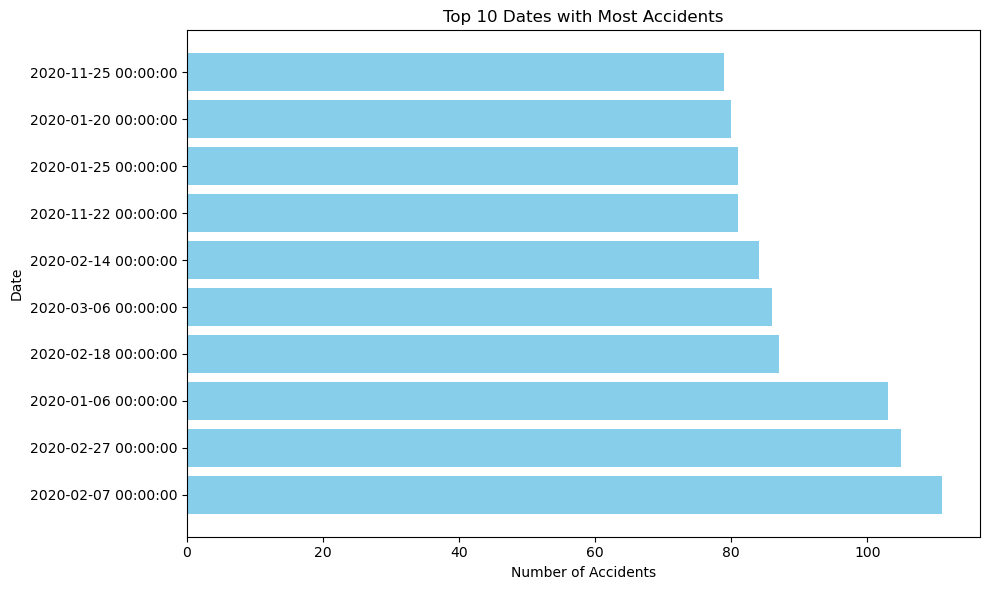

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('accidents.db')

# Query the database
query = '''SELECT accident_date, COUNT(*) as accident_count
           FROM accident_details
           GROUP BY accident_date
           ORDER BY accident_count DESC
           LIMIT 10;'''
top_dates_df = pd.read_sql_query(query, conn)


# Modify the bar chart to horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_dates_df['accident_date'], top_dates_df['accident_count'], color='skyblue')
plt.title('Top 10 Dates with Most Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Date')
plt.tight_layout()
plt.show()
conn.close()

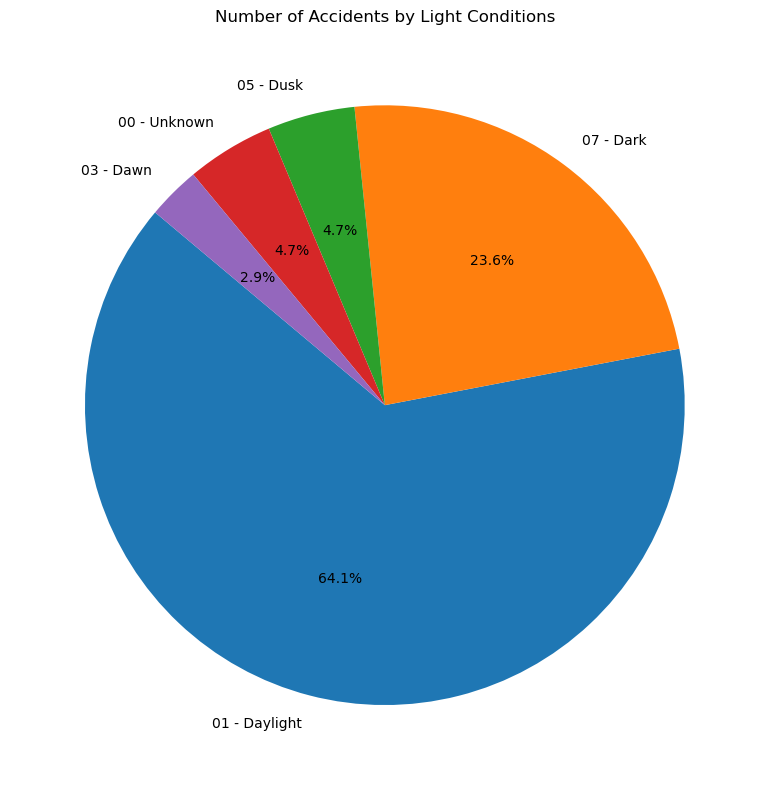

In [9]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database and execute the query
conn = sqlite3.connect('accidents.db')
query = '''SELECT light, COUNT(*) as accident_count
           FROM accident_details
           GROUP BY light
           ORDER BY accident_count DESC;'''
light_conditions_df = pd.read_sql_query(query, conn)
conn.close()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(light_conditions_df['accident_count'], 
        labels=light_conditions_df['light'], 
        autopct='%1.1f%%', startangle=140)
plt.title('Number of Accidents by Light Conditions')
plt.tight_layout()
plt.show()

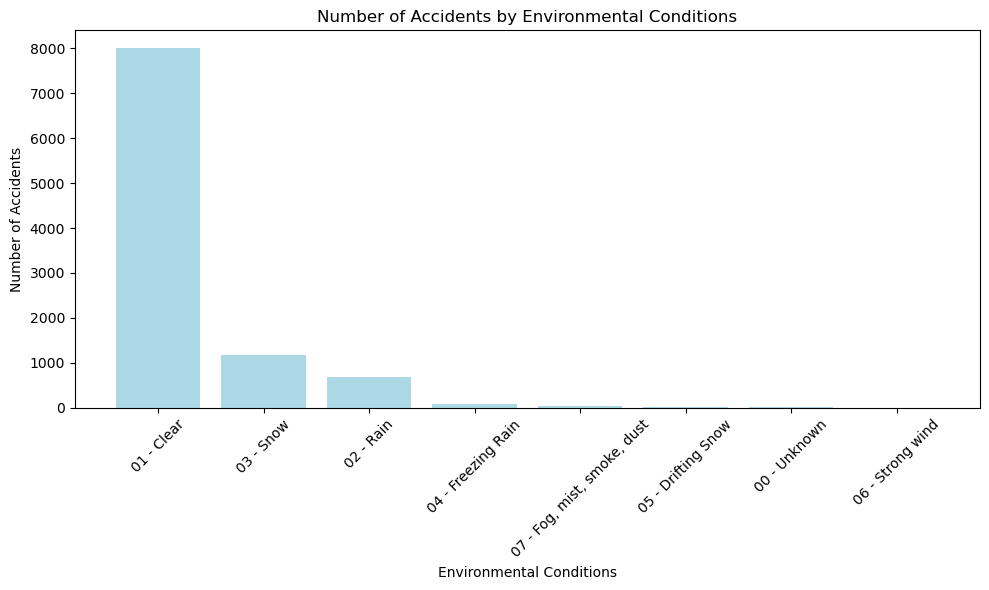

In [10]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database and execute the query
conn = sqlite3.connect('accidents.db')
query = '''SELECT environment_condition, COUNT(*) as accident_count
           FROM accident_details
           GROUP BY environment_condition
           ORDER BY accident_count DESC;'''
env_conditions_df = pd.read_sql_query(query, conn)
conn.close()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(env_conditions_df['environment_condition'], env_conditions_df['accident_count'], color='lightblue')
plt.title('Number of Accidents by Environmental Conditions')
plt.xlabel('Environmental Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

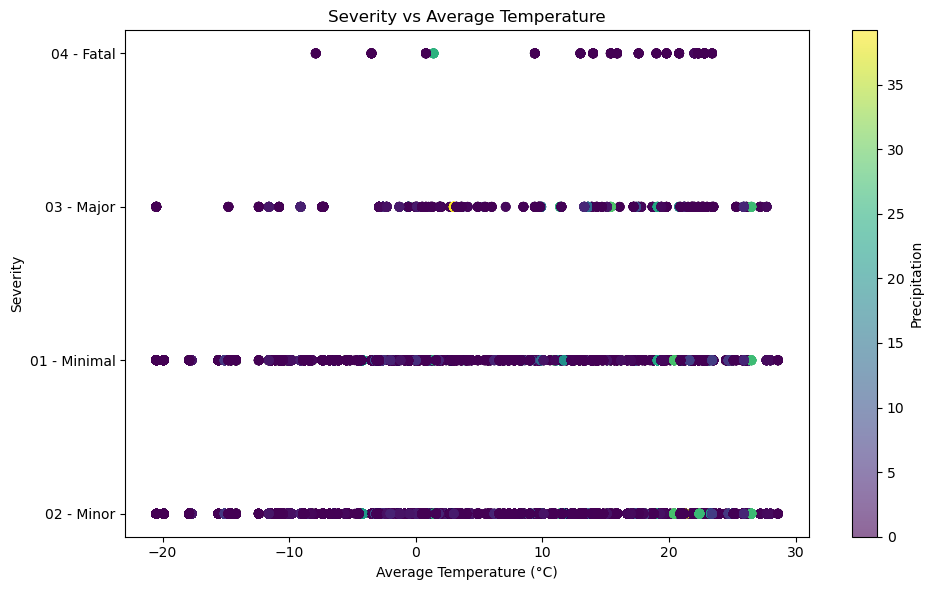

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect('accidents.db')

# Query to fetch severity and weather-related data
query = '''SELECT severity, tavg, prcp
           FROM accidents_data
           JOIN weather_data ON accidents_data.date = weather_data.date;'''
weather_severity_df = pd.read_sql_query(query, conn)
conn.close()

# Clean the data: drop rows with missing or null values
weather_severity_df = weather_severity_df.dropna(subset=['tavg', 'severity', 'prcp'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weather_severity_df['tavg'], weather_severity_df['severity'], 
            alpha=0.6, c=weather_severity_df['prcp'], cmap='viridis')
plt.colorbar(label='Precipitation')
plt.title('Severity vs Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Severity')
plt.tight_layout()
plt.show()

In [21]:
import sqlite3
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Connect to SQLite
conn = sqlite3.connect('accidents.db')

In [22]:
##⛄ Snow t-test:
query_snow = '''
SELECT ad.no__of_vehicles
FROM accident_details ad
JOIN weather_data wd ON ad.accident_date = wd.date
WHERE wd.snow > 0
'''
snow_accidents = pd.read_sql(query_snow, conn)

query_no_snow = '''
SELECT ad.no__of_vehicles
FROM accident_details ad
JOIN weather_data wd ON ad.accident_date = wd.date
WHERE wd.snow = 0
'''
no_snow_accidents = pd.read_sql(query_no_snow, conn)

# Perform t-test
t_stat_snow, p_value_snow = stats.ttest_ind(snow_accidents['no__of_vehicles'],
                                            no_snow_accidents['no__of_vehicles'])
print(f"T-statistic (Snow): {t_stat_snow}, P-value: {p_value_snow}")

T-statistic (Snow): 17.211654505452753, P-value: 2.3598049176497552e-66


In [23]:
##🌧️ Precipitation t-test:
query_precip = '''
SELECT ad.no__of_vehicles
FROM accident_details ad
JOIN weather_data wd ON ad.accident_date = wd.date
WHERE wd.prcp > 0
'''
precip_accidents = pd.read_sql(query_precip, conn)

query_no_precip = '''
SELECT ad.no__of_vehicles
FROM accident_details ad
JOIN weather_data wd ON ad.accident_date = wd.date
WHERE wd.prcp = 0
'''
no_precip_accidents = pd.read_sql(query_no_precip, conn)

# Perform t-test
t_stat_precip, p_value_precip = stats.ttest_ind(precip_accidents['no__of_vehicles'],
                                                no_precip_accidents['no__of_vehicles'])
print(f"T-statistic (Precipitation): {t_stat_precip}, P-value: {p_value_precip}")


T-statistic (Precipitation): -27.81261677797905, P-value: 4.510794533550304e-170


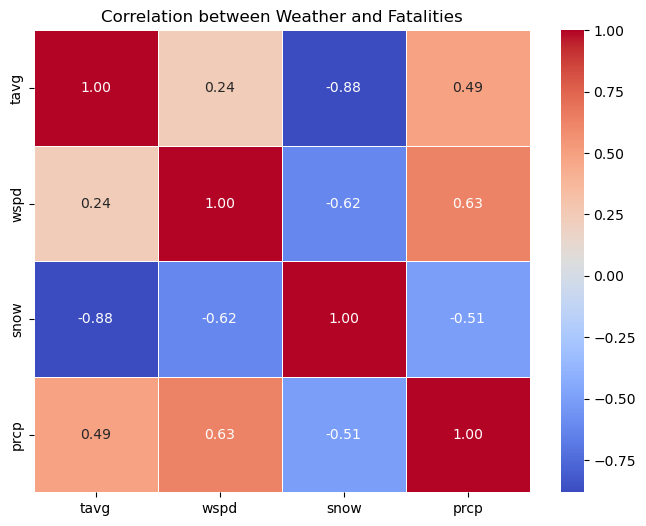

In [31]:
##✅ Example 2: Correlation Between Weather and Fatalities
query_regression = '''
SELECT wd.tavg, wd.wspd, wd.snow, wd.prcp, ad.no__of_fatal
FROM accident_details ad
JOIN weather_data wd ON ad.accident_date = wd.date
WHERE wd.tavg IS NOT NULL
  AND wd.wspd IS NOT NULL
  AND wd.snow IS NOT NULL
  AND wd.prcp IS NOT NULL
  AND ad.no__of_fatal IS NOT NULL
'''
data = pd.read_sql(query_regression, conn)
data = data.loc[:, data.apply(pd.Series.nunique) > 1]

# Compute correlation matrix
# corr_matrix = data.corr()
corr_matrix = data.corr(numeric_only=True)
# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Weather and Fatalities')
plt.show()


In [32]:
##✅ Example 3: Linear Regression: Does Temperature Affect Fatalities?
# Use the same query as above to get data
data = pd.read_sql(query_corr, conn)
data = data.dropna()
# Prepare for regression
X = data[['tavg', 'wspd', 'prcp', 'snow']]
y = data['no__of_fatal']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           no__of_fatal   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -32.67
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               1.00
Time:                        18:40:35   Log-Likelihood:                 3253.6
No. Observations:                 102   AIC:                            -6499.
Df Residuals:                      98   BIC:                            -6489.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133   1.86e-17   7.16e+14      0.0

C:\Users\eek_e\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [29]:
##✅ Example 4: Categorical Analysis Based on Temperature
query_weather_condition = '''
SELECT 
    CASE WHEN wd.tavg < 0 THEN 'Cold' ELSE 'Warm' END AS weather_condition,
    AVG(ad.no__of_fatal) AS avg_fatalities
FROM accident_details ad
JOIN weather_data wd ON ad.accident_date = wd.date
GROUP BY weather_condition
'''
weather_grouped = pd.read_sql(query_weather_condition, conn)
print(weather_grouped)
conn.close()

  weather_condition  avg_fatalities
0              Cold             1.0
1              Warm             1.0


In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('accidents.db')

query = '''
SELECT date, latitude, longitude, severity
FROM accidents_data
WHERE latitude IS NOT NULL AND longitude IS NOT NULL AND severity IS NOT NULL
'''
df = pd.read_sql(query, conn)
conn.close()


In [2]:
import folium
from folium.plugins import FeatureGroupSubGroup
from branca.element import Template, MacroElement

# Create base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Create base group
all_accidents = folium.FeatureGroup(name='All Severities').add_to(m)

# Unique severity values
severities = sorted(df['severity'].unique())

# Create subgroups per severity level
severity_groups = {}
for sev in severities:
    group = folium.FeatureGroup(name=f'severity {sev}', show=False)
    severity_groups[sev] = group
    m.add_child(group)

# Add markers to groups
for _, row in df.iterrows():
    popup_text = f"Date: {row['date']}<br>Severity: {row['severity']}"
    marker = folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup=popup_text
    )

    # Add to specific group and general group
    marker.add_to(severity_groups[row['severity']])
    marker.add_to(all_accidents)

# Add layer control
folium.LayerControl(collapsed=False).add_to(m)

# Save to file
m.save("accidents_severity_map.html")